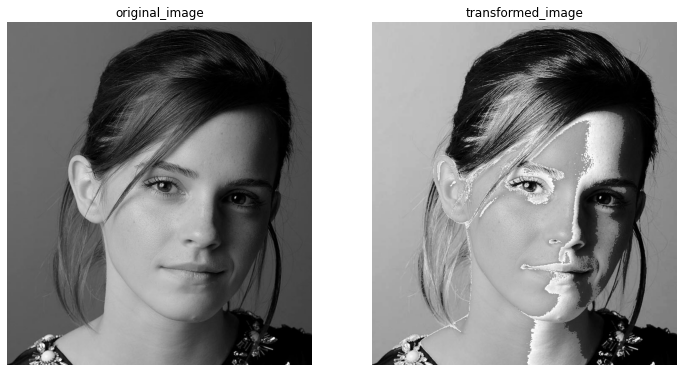

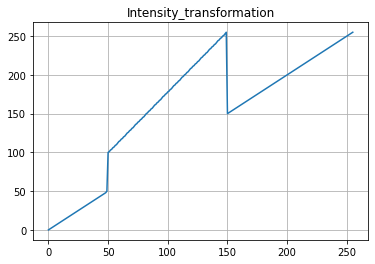

In [6]:
#Q1 Intensity Transformation
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
img= cv.imread('emma_gray.jpg')
assert img is not None


fig,ax = plt.subplots(1, 2, figsize=(12,8))
ax[0].imshow(img, cmap = 'gray', vmin =0, vmax=255)
ax[0].axis('off')
ax[0].title.set_text('original_image')


trans_1 = np.linspace(0,50,50)
trans_2 = np.linspace(100,255,100)
trans_3 = np.linspace(150,255,106)
transformation = np.concatenate([trans_1, trans_2, trans_3], axis=0).astype(np.uint8)
assert len(transformation) == 256

transformed = cv.LUT(img, transformation)

ax[1].imshow(transformed, cmap = 'gray', vmin =0, vmax=255)
ax[1].axis('off')
ax[1].title.set_text('Transformed_image')


fig, ax = plt.subplots()
ax.plot(transformation)
ax.grid()
ax.title.set_text('Intensity_transformation')




(0.0, 255.0)

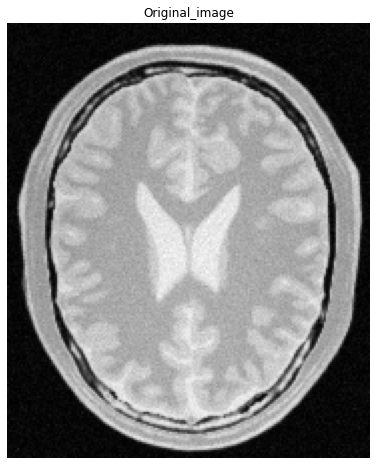

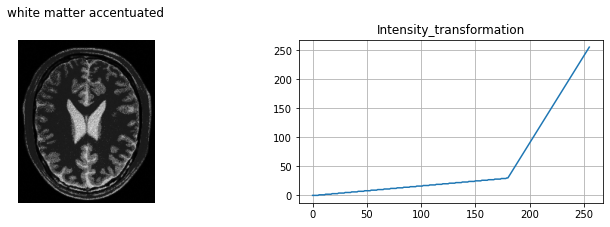

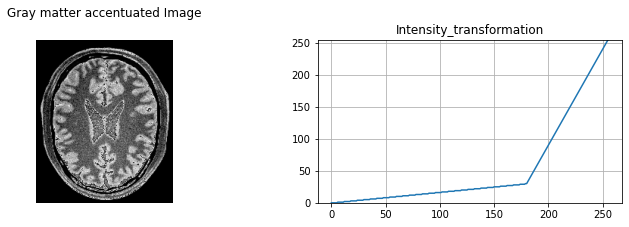

In [12]:
#Question2
img = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img is not None

fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(img, cmap = 'gray', vmin =0, vmax=255)
ax.axis('off')
ax.title.set_text('Original_image')

# accentuate white matter
trans_1 = np.linspace(0, 30, 180)  
trans_2 = np.linspace(30, 255, 76)
trans = np.concatenate([trans_1, trans_2], axis=0).astype(np.uint8)
assert len(trans) == 256

transformed_img = cv.LUT(img, trans)

fig,ax  = plt.subplots(1, 2, figsize=(12,3))

ax[0].imshow(transformed_img, cmap = 'gray', vmin =0, vmax=255)
ax[0].axis('off')
ax[0].title.set_text('white matter accentuated')
ax[0].xaxis.tick_top()

ax[1].plot(transformation)
ax[1].grid()
ax[1].title.set_text('Intensity_transformation')

# accentuate grey matter
trans_1 = np.linspace(0, 10, 150) 
trans_2 = np.linspace(30, 235 ,66)
trans_3 = np.linspace(20,255,40)
trans= np.concatenate([trans_1, trans_2, trans_3], axis=0).astype(np.uint8)
assert len(trans) == 256

transformed = cv.LUT(img, trans)

fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))

ax1.imshow(transformed, cmap = 'gray', vmin =0, vmax=255)
ax1.axis('off')
ax1.title.set_text('Gray matter accentuated Image')
ax1.xaxis.tick_top()

ax2.plot(transformation)
ax2.grid()
ax2.title.set_text('Intensity_transformation')
ax2.set_ylim([0,255])



(array([2.0560e+03, 0.0000e+00, 8.0000e+00, 9.3000e+01, 5.0000e+01,
        1.6990e+03, 2.4350e+03, 1.1270e+03, 1.1010e+03, 1.7380e+03,
        1.9430e+03, 4.2420e+03, 1.7900e+02, 5.3590e+03, 1.3800e+02,
        2.9820e+03, 8.9300e+03, 4.8500e+02, 3.2450e+03, 4.1110e+03,
        1.4837e+04, 7.9610e+03, 1.4028e+04, 2.0637e+04, 1.6379e+04,
        1.9605e+04, 6.9440e+03, 1.8622e+04, 1.9429e+04, 2.0015e+04,
        4.8250e+03, 2.1088e+04, 1.9991e+04, 1.5060e+04, 1.3889e+04,
        1.5649e+04, 2.0817e+04, 1.8340e+04, 1.0991e+04, 1.0575e+04,
        1.3343e+04, 3.9870e+03, 1.2663e+04, 1.0150e+04, 6.1810e+03,
        1.0985e+04, 1.2674e+04, 5.2490e+03, 8.3970e+03, 1.0050e+04,
        1.1126e+04, 6.7230e+03, 4.7720e+03, 8.0290e+03, 1.0165e+04,
        5.3130e+03, 6.3240e+03, 6.2540e+03, 6.2250e+03, 8.6690e+03,
        4.4780e+03, 3.5990e+03, 5.6670e+03, 6.7460e+03, 6.0390e+03,
        3.6810e+03, 5.6040e+03, 4.6550e+03, 4.7960e+03, 4.6370e+03,
        3.8730e+03, 3.6860e+03, 4.1650e+03, 3.35

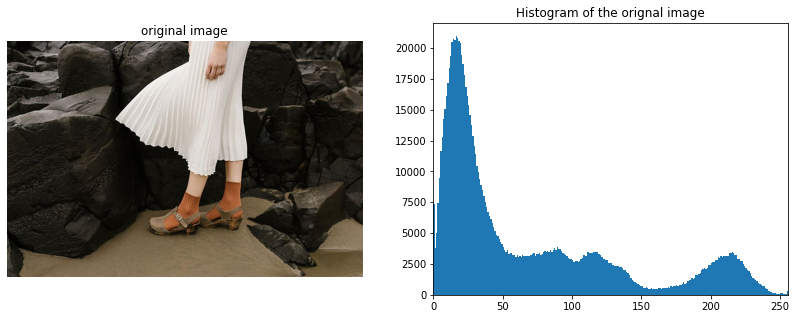

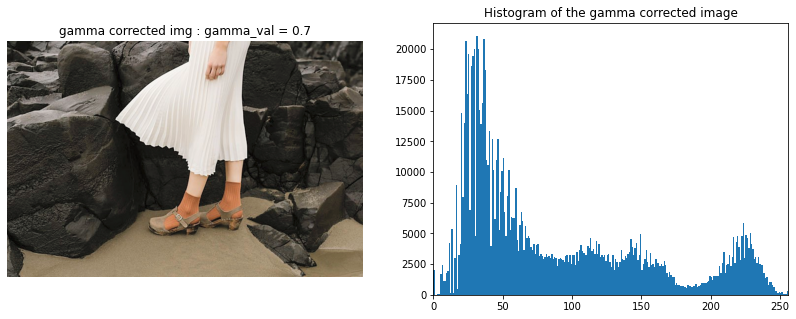

In [18]:
# Question3
original = cv.imread(r'highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert original is not None
original_lab = cv.cvtColor(original, cv.COLOR_BGR2LAB)
L = original_lab[:,:,0]

fig,ax = plt.subplots(1,2, figsize=(14,5))
original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)
ax[0].imshow(original_rgb)
ax[0].axis('off')
ax[0].title.set_text('original image')


ax[1].set_xlim([0, 256])
ax[1].title.set_text('Histogram of the orignal image')
ax[1].hist(original_rgb.flatten(), 256, [0, 256])

gamma = 0.7
correction = np.array([(pixel/255)**gamma*255 for pixel in range(0, 256)]).astype(np.uint8)
corrected = cv.LUT(L, correction)
original_lab[:,:,0] = corrected
corrected_rgb = cv.cvtColor(original_lab, cv.COLOR_LAB2RGB)

fig,ax = plt.subplots(1,2, figsize=(14,5))
ax[0].imshow(corrected_rgb)
ax[0].axis('off')
ax[0].title.set_text('gamma corrected img : gamma_val = 0.7')


ax[1].set_xlim([0, 256])
ax[1].title.set_text('Histogram of the gamma corrected image')
ax[1].hist(corrected_rgb.flatten(), 256, [0, 256])

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.8320e+04, 0.0000e+00,
        1.7500e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        9.4410e+03, 1.6420e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6457e+04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0381e+04,
        0.0000e+00, 0.0000e+00, 2.9450e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.1490e+03, 1.0380e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

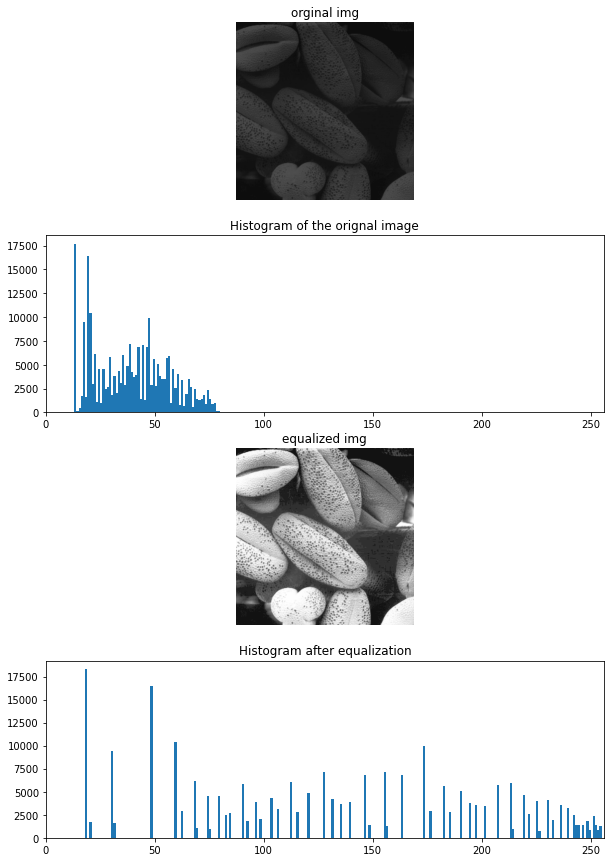

In [20]:
#Question4
def histogramEqualization(image):
    hist ,bins = np.histogram(image.ravel(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf*(len(hist)-1)/cdf.max()
    transformation = cdf_normalized.astype(int)
    equalized = cv.LUT(image, transformation)
    return equalized
    
shells = cv.imread(r'shells.png', cv.IMREAD_GRAYSCALE)
assert shells is not None

equalized = histogramEqualization(shells)

fig, ax = plt.subplots(4, figsize=(10,15))
ax[0].axis('off')
ax[0].title.set_text('orginal img')
ax[0].imshow(shells, cmap = 'gray', vmin =0, vmax=255)

ax[1].set_xlim([0, 256])
ax[1].title.set_text('Histogram of the orignal image')
ax[1].hist(shells.flatten(), 256, [0, 256])

ax[2].axis('off')
ax[2].title.set_text('equalized img')
ax[2].imshow(equalized, cmap = 'gray', vmin =0, vmax=255)

ax[3].set_xlim([0, 256])
ax[3].title.set_text('Histogram after equalization')
ax[3].hist(equalized.flatten(), 256, [0, 256])

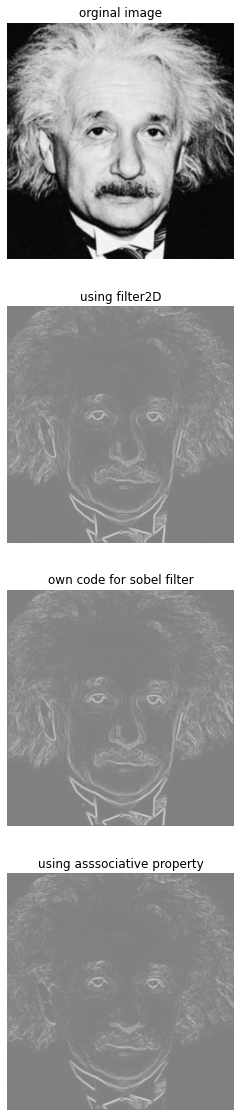

In [22]:
# Question 6
import math

img = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert shells is not None

fig, ax = plt.subplots(4, figsize=(20,20))
ax[0].axis('off')
ax[0].title.set_text('orginal image')
ax[0].imshow(img, cmap = 'gray', vmin =0, vmax=255)

#a)
kernel_y = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype = np.float32)
image_y = cv.filter2D(img, -1, kernel_y)

kernel_x = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype = np.float32)
image_x = cv.filter2D(img, -1, kernel_x)

grad_mag = np.sqrt(image_y**2 + image_x**2)

ax[1].axis('off')
ax[1].title.set_text('using filter2D')
ax[1].imshow(grad_mag, cmap = 'gray', vmin =-1020, vmax=1020)

#b)
def filter(image, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1] % 2 == 1
    k_h, k_w = math.floor(kernel.shape[0]/2), math.floor(kernel.shape[1]/2)
    h, w = image.shape
    image_float = image.astype('float')
    result = np.zeros(image.shape, 'float')

    for m in range(k_h, h - k_h):
        for n in range(k_w , w - k_w):
            result[m, n] = np.dot(image_float[m - k_h : m + k_h + 1 , n - k_w : n+ k_w + 1].flatten(), kernel.flatten())

    return result

image_y1 = filter(img, kernel_y)
image_x1 = filter(img, kernel_x)
grad_mag1 = np.sqrt(image_y1**2 + image_x1**2)

ax[2].axis('off')
ax[2].title.set_text('own code for sobel filter')
ax[2].imshow(grad_mag1, cmap = 'gray', vmin =-1020, vmax=1020)

#c)
kernel_y1 = np.array([-1, 0, 1], dtype = np.float32)
kernel_y2 = np.array([[-1], [2], [1]], dtype = np.float32)
image_y2 = cv.filter2D(img, -1, kernel_y1)
image_y2 = cv.filter2D(image_y2, -1, kernel_y2)

kernel_x1 = np.array([-1, -2, -1], dtype = np.float32)
kernel_x2 = np.array([[1], [0], [-1]], dtype = np.float32)
image_x2 = cv.filter2D(img, -1, kernel_x1)
image_x2 = cv.filter2D(image_x2, -1, kernel_x2)

grad_mag2 = np.sqrt(image_y2**2 + image_x2**2)

ax[3].axis('off')
ax[3].title.set_text('using asssociative property')
ax[3].imshow(grad_mag2, cmap = 'gray', vmin =-1020, vmax=1020)